# Visualizing cleaned and aggregated BigData from spark job

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import seaborn as sns

In [86]:
#Loading the data
spark = SparkSession.builder.getOrCreate()
agg_sales_by_year = spark.read.parquet('E:/PROJECT/Global-EV-data-portfolio/L2-Batch-ETL-with-Spark-&-Hadoop/outputs/aggregated/sales_by_year')
agg_sales_by_region = spark.read.parquet('E:/PROJECT/Global-EV-data-portfolio/L2-Batch-ETL-with-Spark-&-Hadoop/outputs/aggregated/sales_by_region')
agg_sales_by_region=agg_sales_by_region[agg_sales_by_region['region'] != 'World']
agg_bev_phev_share = (spark.read.parquet('E:/PROJECT/Global-EV-data-portfolio/L2-Batch-ETL-with-Spark-&-Hadoop/outputs/aggregated/bev_phev_share')).toPandas()
agg_sales_by_region

DataFrame[region: string, Region_Sales: double]

#### Visualize the data

<Axes: title={'center': 'Global EV Sales by Year'}, xlabel='Year', ylabel='Vehicles Sold'>

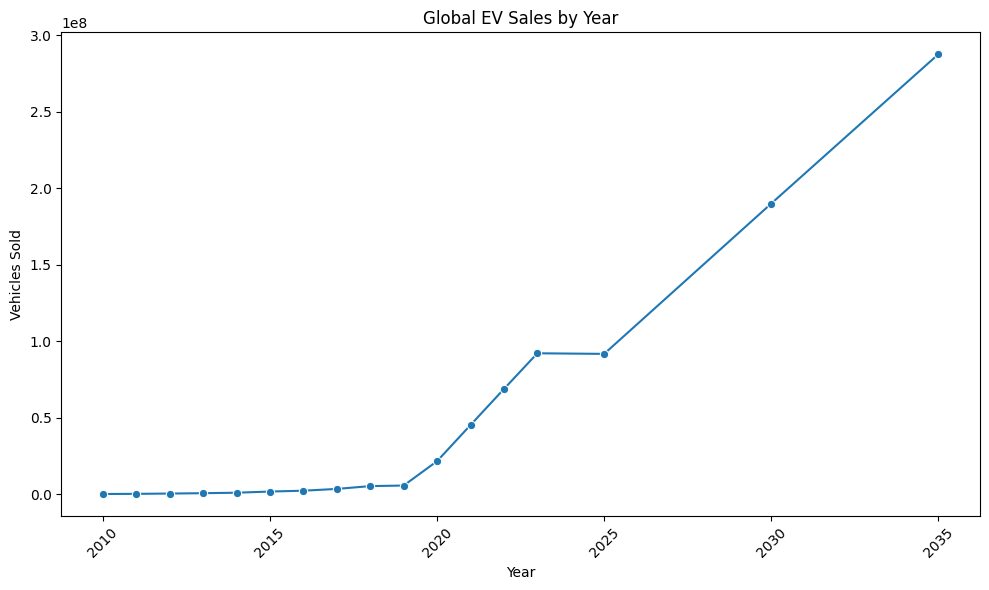

In [87]:
# #Global EV sales by year

plt.figure(figsize=(10,6))
p1 = sns.lineplot(data=agg_sales_by_year.toPandas(), x="year", y="Total_Sales", marker="o")
plt.title("Global EV Sales by Year")
plt.xlabel("Year")
plt.ylabel("Vehicles Sold")
plt.xticks(rotation=45)
plt.tight_layout()
p1

<Axes: title={'center': 'Top 10 Regions by EV Sales (All Years)'}, xlabel='Region', ylabel='Total Vehicles Sold'>

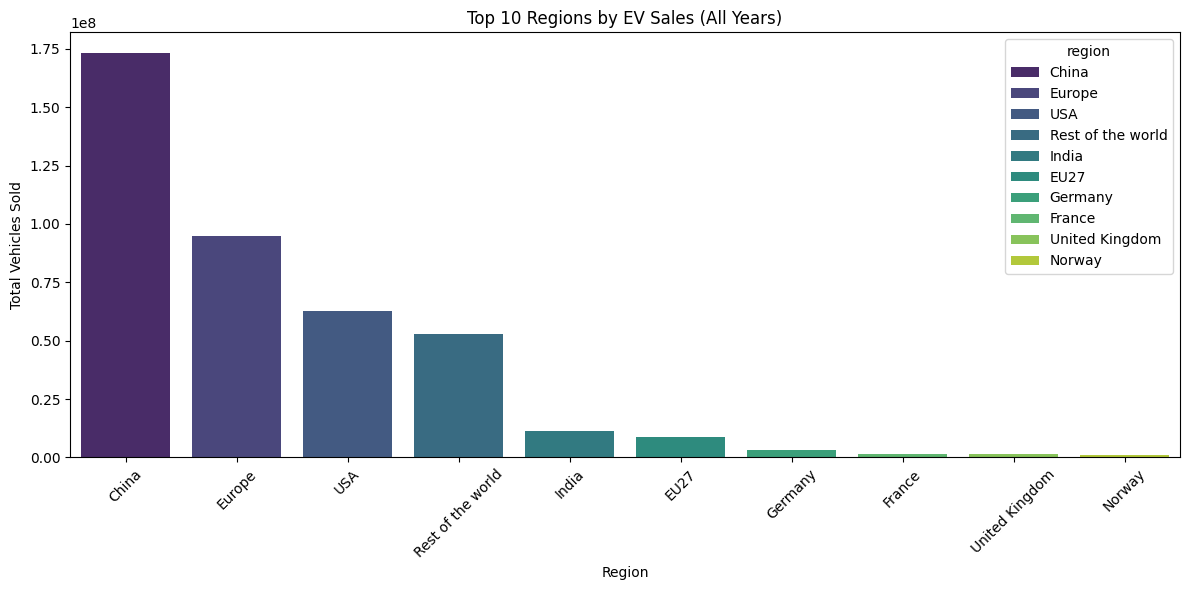

In [88]:
#Sales by region (Top 10)
top_regions = agg_sales_by_region.toPandas().head(10)

plt.figure(figsize=(12,6))
p2 = sns.barplot(data=top_regions, x="region", y="Region_Sales", palette="viridis", hue='region', legend=True)
plt.title("Top 10 Regions by EV Sales (All Years)")
plt.xlabel("Region")
plt.ylabel("Total Vehicles Sold")
plt.xticks(rotation=45)
plt.tight_layout()
p2


Text(0.5, 1.0, 'BEV vs PHEV share (2023)')

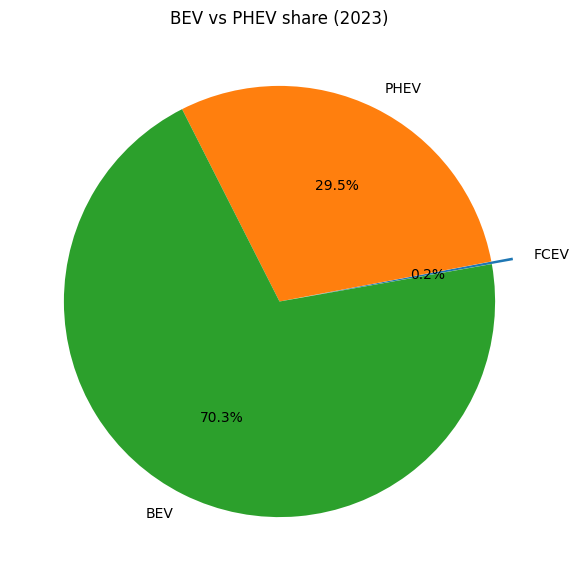

In [106]:
#BEV vs PHEV stock share in 2023 
plt.figure(figsize=(7,7))
plt.pie(agg_bev_phev_share['total_stock'], labels=agg_bev_phev_share['powertrain'], autopct="%1.1f%%", startangle=10, explode=[0.1 if label == 'FCEV' else 0 for label in agg_bev_phev_share['powertrain']])
plt.title('BEV vs PHEV share (2023)')